In [4]:
import pytholog as pl
from sympy import *

In [5]:
init_printing("mathjax") # sympy expression printing

In [6]:
Rational(1, 2)

In [7]:
x = symbols("x")
a,b,c = symbols("a,b,c", real=True)
i,j,n = symbols("i,j,n", integer=True)
f = symbols("f", cls=Function)

In [12]:
I    # imaginary unit

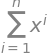

In [11]:
Sum(x**i, (i, 1, n))

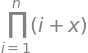

In [13]:
Product(x+i, (i, 1, n))

### Set A

In [17]:
from sympy.logic.inference import satisfiable
from sympy.logic.inference import valid
from sympy.logic.inference import *

In [14]:
rain = Symbol("rain") # It is raining.

In [15]:
hagrid= Symbol("hagrid") #Harry Visited hagrid

In [16]:
dumbledore= Symbol("dumbledore") #Harry Visited Dumbledore

In [19]:
'''
1. If it didn’t rain, Harry visited Hagrid today.
2. Harry visited Hagrid or Dumbledore today, but not both.
3. Harry visited Dumbledore today.
'''

knowledge = And(Implies(Not(rain), hagrid), Or(hagrid, dumbledore), Not(And(hagrid,dumbledore)), dumbledore)

In [20]:
knowledge

In [1]:
from sympy import symbols, And, Or, satisfiable

A, B = symbols('A B')

knowledge = And(A, Or(A, B))

models = satisfiable(And(knowledge, A))

print(models)
for model in models:
    print(model)

{B: True, A: True}
B
A


In [33]:
p3 = And(Not(hagrid),dumbledore)
p4 = Implies(dumbledore,rain)

print(valid(Implies(And(p3,p4),rain)))

Implies(dumbledore, rain)
True


In [34]:
p1=And((rain),Not(hagrid))

print(p1)
print(satisfiable(p1))

rain & ~hagrid
{rain: True, hagrid: False}


In [35]:
from sympy.logic import *
# Create new classes, each having a name, or a symbol, representing each proposition.
rain = Symbol("rain") # It is raining.
hagrid = Symbol("hagrid") # Harry visited Hagrid
dumbledore = Symbol("dumbledore") # Harry visited Dumbledore
# Save sentences into the KB
knowledge = And( # Starting from the "And" logical connective, becasue each proposition represents knowledge that we know to be true.
    Implies(Not(rain), hagrid), # ¬(It is raining) → (Harry visited Hagrid)
    Or(hagrid, dumbledore), # (Harry visited Hagrid) ∨ (Harry visited Dumbledore).
    Not(And(hagrid, dumbledore)), # ¬(Harry visited Hagrid ∧ Harry visited Dumbledore) i.e. Harry did not visit both Hagrid and Dumbledore.
    dumbledore # Harry visited Dumbledore. Note that while previous propositions contained multiple symbols with connectors, this is a proposition consisting of one symbol. This means that we take as a fact that, in this KB, Harry visited Dumbledore.
)

knowledge

### Set B

1. It is not sunny this afternoon and it is colder than yesterday.
2. We will go swimming only if it is sunny.
3. If we do not go swimming then we will take a canoe trip.
4. If we take a canoe trip, then we will be home by sunset.

Question:
<br>
i) Represent the knowledge base\n
<br>
ii) Check whether they will be home by sunset

In [2]:
# imports
from sympy import *
from sympy.logic.inference import satisfiable
from sympy.logic.inference import valid
from sympy.logic.inference import *
from sympy import symbols, And, Or, satisfiable

In [3]:
# symbols

sunny = Symbol('sunny')         # it is sunny

colder = Symbol('colder')       # it is colder than yesterday

swimming = Symbol('swimming')   # will go swimming

canoe = Symbol('canoe')         # will take a canoe trip

sunset = Symbol('sunset')       # will be home by sunset

In [4]:
# i) Represent the knowledge base

knowledge = And(
    And(Not(sunny), colder),
    Implies(swimming, sunny),
    Implies(Not(swimming), canoe),
    Implies(canoe, sunset),
)

knowledge

colder & ~sunny & (Implies(canoe, sunset)) & (Implies(swimming, sunny)) & (Implies(~swimming, canoe))

In [5]:
# ii) Check whether they will be home by sunset

models = satisfiable(knowledge, all_models = True)

for model in models:
    print(model)

    if model[sunset]:
        print("\nThey will be home by sunset...")

{canoe: True, colder: True, sunset: True, sunny: False, swimming: False}

They will be home by sunset...


In [ ]:
import requests
from PIL import Image
from io import BytesIO

url = "https://api.thecatapi.com/v1/images/search"

response = requests.get(url)

image_url = response.json()[0]['url']
print(f"Image URL: {image_url}")

image_response = requests.get(image_url)

if image_response.status_code == 200:
    image = Image.open(BytesIO(image_response.content))
    display(image)
else:
    print(f"Failed to fetch image. Status code: {image_response.status_code}")
